In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz




In [66]:
filename = '../data/body-signal-smoking/'

df = pd.read_csv(filename + 'smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [67]:
x = df.drop(['ID', 'oral','smoking'], axis=1)
y = df['smoking']


In [68]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [38]:
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

### Transformando Dados Categóricos em Dados Numéricos

In [69]:
d = defaultdict(preprocessing.LabelEncoder)
categorical = ['gender', 'tartar']

lamb = lambda x: d[x.name].fit_transform(x) if x.name in categorical else x
lamb_inv = lambda x: d[x.name].inverse_transform(x) if x.name in categorical else x 
fit = df.apply(lamb)
fit.apply(lamb_inv)

x = x.apply(lamb)



In [70]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [ ]:
y_train

## Arvore de Decisão

In [71]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
#Ein
y_pred = clf_tree.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28226
           1       1.00      1.00      1.00     16327

    accuracy                           1.00     44553
   macro avg       1.00      1.00      1.00     44553
weighted avg       1.00      1.00      1.00     44553



In [73]:
# Eout
y_pred = clf_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7011
           1       0.71      0.71      0.71      4128

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



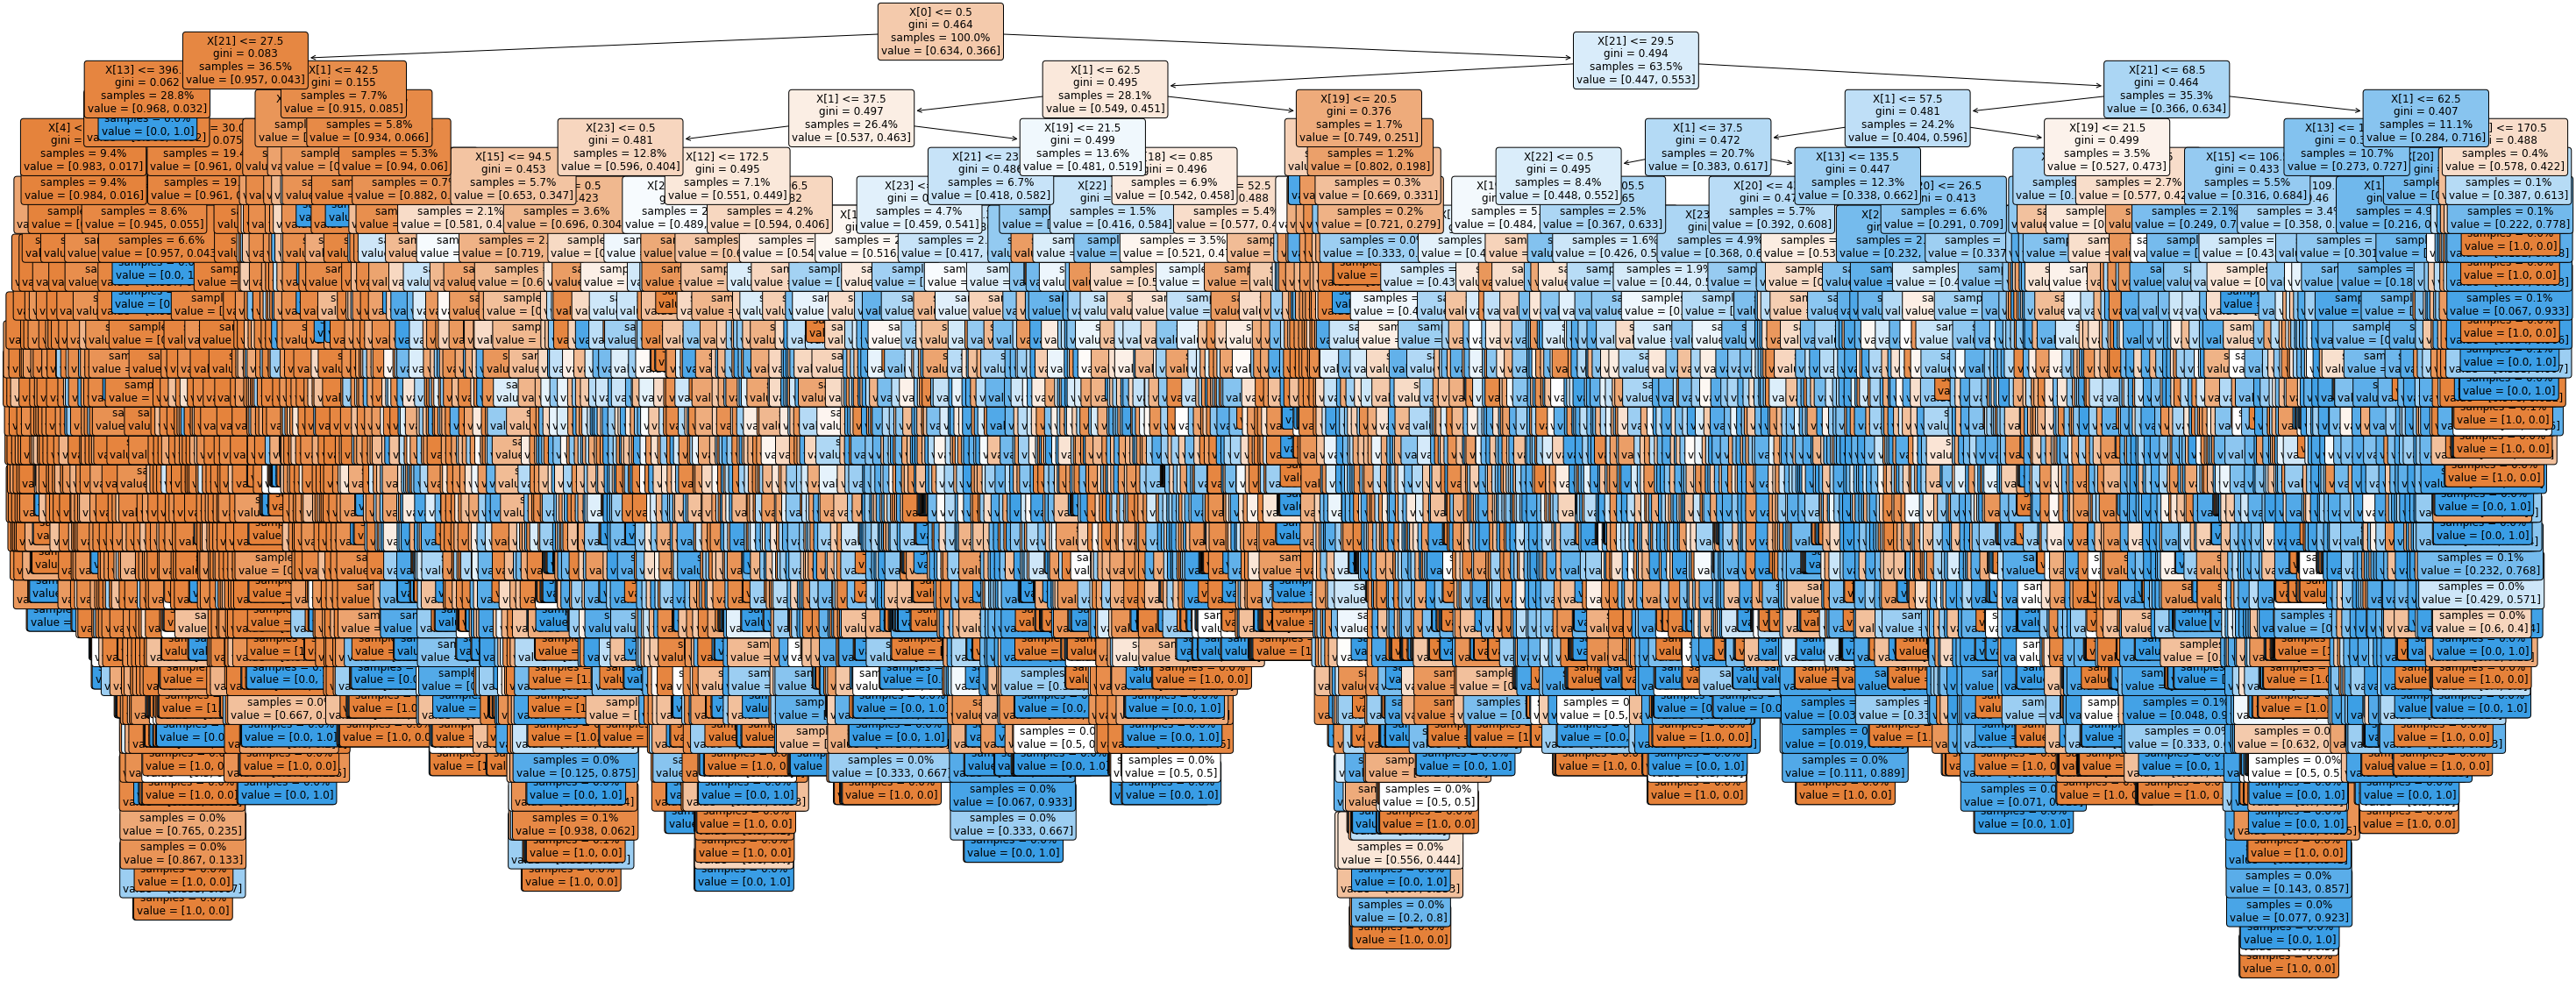

In [74]:
#Decision Tree
plt.figure(figsize=(50,20))
plot_tree(
    clf_tree,
    filled=True, 
    proportion = True,
    fontsize=12, 
    rounded = True)
plt.show()

2468
[0.00000000e+00 5.60798923e-05 1.10258515e-04 ... 3.32799695e-01
 3.43716821e-01 4.64463396e-01]


<ipython-input-75-d602ed2de151>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


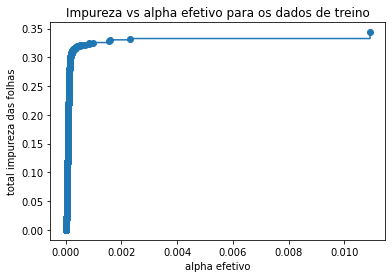

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)

path = clf_tree.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(len(ccp_alphas))
print(impurities)

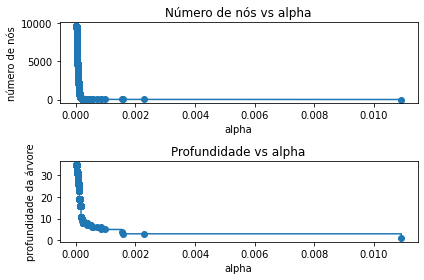

In [76]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

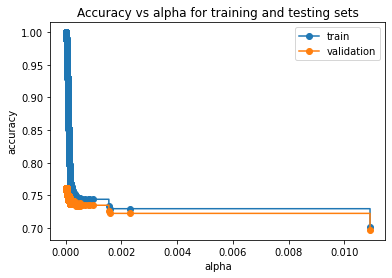

3.429791772713643e-05


In [77]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
val_scores = [clf.score(x_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

best_acc = 0
for v, i in zip(val_scores, range(len(val_scores))):
  if best_acc < v:
    best_acc = v
    best_alpha = clfs[i].ccp_alpha

print(best_alpha)

Ein: 0.0124
Eout: 0.2290
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7011
           1       0.70      0.68      0.69      4128

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139



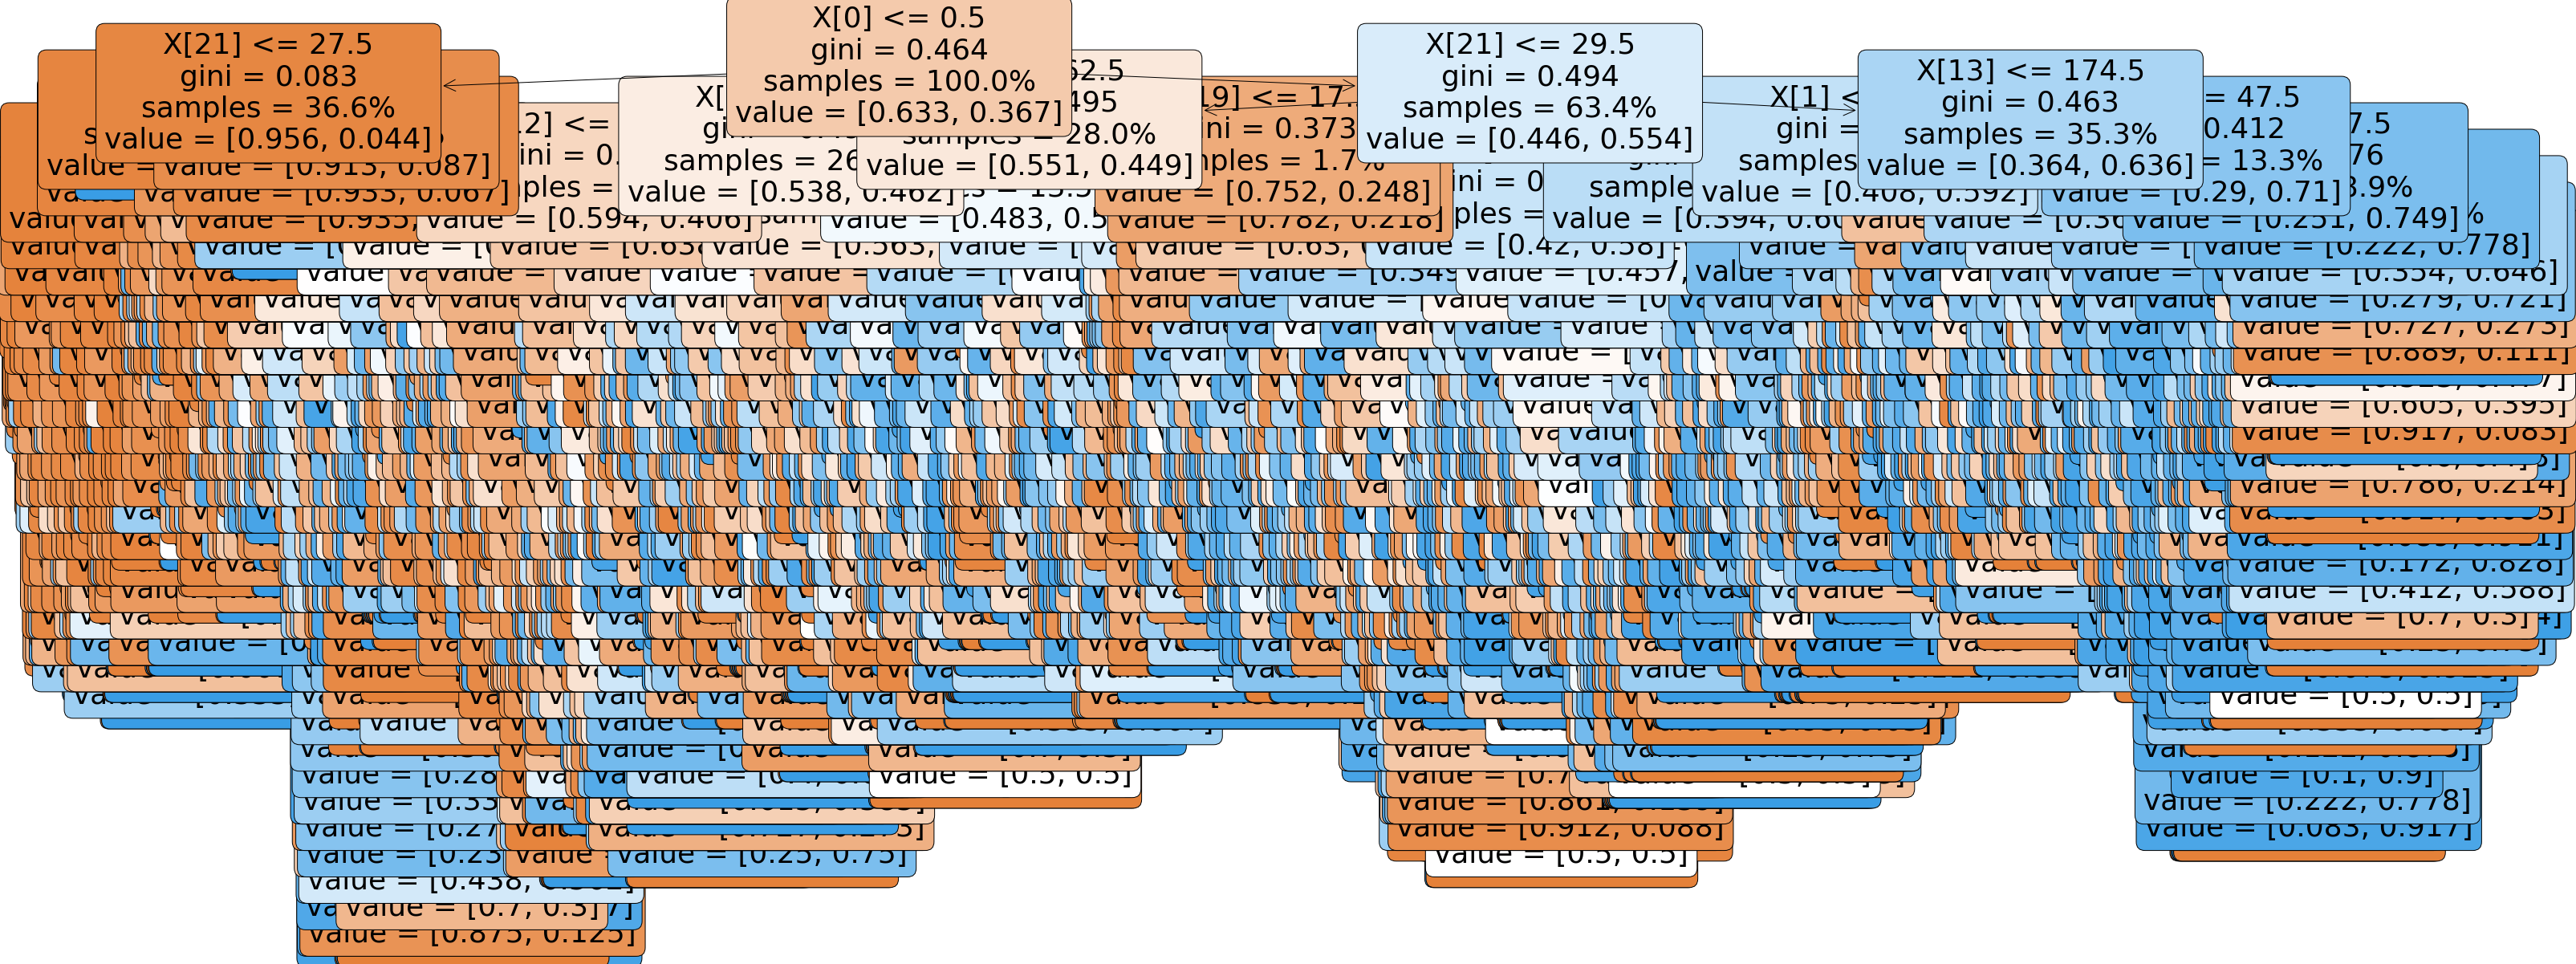

In [78]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(x_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=36, 
    rounded = True)
plt.show()

## SVM

In [86]:
mean = x.mean()
x -= mean
std = x.std(axis=0)
x /= std


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [93]:
param_grid = {  "C": [1, 5, 10, 50],
                "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
}

grid = GridSearchCV(estimator=SVC(kernel='rbf', max_iter=5000), param_grid=param_grid, cv=5, n_jobs=-1)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

clf = grid.best_estimator_


In [91]:
#Ein
y_pred = clf.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76     28156
           1       0.50      0.11      0.18     16397

    accuracy                           0.63     44553
   macro avg       0.57      0.52      0.47     44553
weighted avg       0.59      0.63      0.55     44553



In [92]:
#Eout

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      7081
           1       0.46      0.10      0.17      4058

    accuracy                           0.63     11139
   macro avg       0.55      0.52      0.46     11139
weighted avg       0.58      0.63      0.55     11139



## Rede Neural

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [43]:
clf = Sequential()
clf.add(Dense(12, input_dim=24, kernel_initializer='normal', activation='relu'))
clf.add(Dense(12, kernel_initializer='normal', activation='softmax'))
clf.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


sgd = optimizers.sgd_experimental.SGD(learning_rate=0.01)

clf.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(clf.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 12)                300       
                                                                 
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
history = clf.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
2785/2785 [==============================] - 2s 697us/step - loss: 0.6087 - accuracy: 0.6662
Epoch 2/100
2785/2785 [==============================] - 2s 737us/step - loss: 0.5656 - accuracy: 0.6999
Epoch 3/100
2785/2785 [==============================] - 2s 746us/step - loss: 0.5553 - accuracy: 0.7037
Epoch 4/100
2785/2785 [==============================] - 2s 723us/step - loss: 0.5512 - accuracy: 0.7063
Epoch 5/100
2785/2785 [==============================] - 2s 704us/step - loss: 0.5473 - accuracy: 0.7094
Epoch 6/100
2785/2785 [==============================] - 2s 704us/step - loss: 0.5458 - accuracy: 0.7079
Epoch 7/100
2785/2785 [==============================] - 2s 701us/step - loss: 0.5441 - accuracy: 0.7089
Epoch 8/100
2785/2785 [==============================] - 2s 702us/step - loss: 0.5429 - accuracy: 0.7092
Epoch 9/100
2785/2785 [==============================] - 2s 703us/step - loss: 0.5422 - accuracy: 0.7105
Epoch 10/100
2785/2785 [==============================]

In [45]:
#Ein
y_pred = np.round(clf.predict(x_train))

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     28275
           1       0.62      0.68      0.65     16278

    accuracy                           0.73     44553
   macro avg       0.71      0.72      0.71     44553
weighted avg       0.74      0.73      0.73     44553



In [46]:
#Eout

y_pred = np.round(clf.predict(x_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6962
           1       0.63      0.67      0.65      4177

    accuracy                           0.73     11139
   macro avg       0.71      0.71      0.71     11139
weighted avg       0.73      0.73      0.73     11139



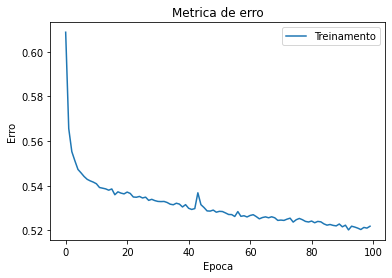

In [47]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [48]:
mean = x.mean()
x -= mean
std = x.std(axis=0)
x /= std


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [49]:
clf = Sequential()
clf.add(Dense(12, input_dim=24, kernel_initializer='normal', activation='relu'))
clf.add(Dense(12, kernel_initializer='normal', activation='softmax'))
clf.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


sgd = optimizers.sgd_experimental.SGD(learning_rate=0.01)

clf.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(clf.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                300       
                                                                 
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dense_26 (Dense)            (None, 1)                 13        
                                                                 
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
history = clf.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
2785/2785 [==============================] - 2s 719us/step - loss: 0.6598 - accuracy: 0.6332
Epoch 2/100
2785/2785 [==============================] - 2s 737us/step - loss: 0.6572 - accuracy: 0.6332
Epoch 3/100
2785/2785 [==============================] - 2s 738us/step - loss: 0.6571 - accuracy: 0.6332
Epoch 4/100
2785/2785 [==============================] - 2s 699us/step - loss: 0.6571 - accuracy: 0.6332
Epoch 5/100
2785/2785 [==============================] - 2s 689us/step - loss: 0.6569 - accuracy: 0.6332
Epoch 6/100
2785/2785 [==============================] - 2s 693us/step - loss: 0.6565 - accuracy: 0.6332
Epoch 7/100
2785/2785 [==============================] - 2s 714us/step - loss: 0.6557 - accuracy: 0.6332
Epoch 8/100
2785/2785 [==============================] - 2s 695us/step - loss: 0.6529 - accuracy: 0.6332
Epoch 9/100
2785/2785 [==============================] - 2s 696us/step - loss: 0.6297 - accuracy: 0.6332
Epoch 10/100
2785/2785 [==============================]

In [51]:
#Ein
y_pred = np.round(clf.predict(x_train))

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     28211
           1       0.66      0.77      0.71     16342

    accuracy                           0.77     44553
   macro avg       0.75      0.77      0.76     44553
weighted avg       0.78      0.77      0.77     44553



In [52]:
#Eout

y_pred = np.round(clf.predict(x_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      7026
           1       0.65      0.76      0.70      4113

    accuracy                           0.76     11139
   macro avg       0.75      0.76      0.75     11139
weighted avg       0.77      0.76      0.76     11139



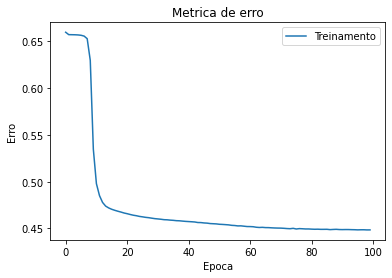

--> Acuracia: 0.7594


In [54]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(clf.predict(x_train))
print(f'--> Acuracia: {accuracy_score(y_test, y_pred):.4f}')

### Treino com Validação

In [57]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)


In [58]:
clf = Sequential()
clf.add(Dense(12, input_dim=24, kernel_initializer='normal', activation='relu'))
clf.add(Dense(12, kernel_initializer='normal', activation='softmax'))
clf.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


sgd = optimizers.sgd_experimental.SGD(learning_rate=0.01)

clf.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(clf.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 12)                300       
                                                                 
 dense_28 (Dense)            (None, 12)                156       
                                                                 
 dense_29 (Dense)            (None, 1)                 13        
                                                                 
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
history = clf.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=16)

Epoch 1/100
1783/1783 [==============================] - 2s 880us/step - loss: 0.6601 - accuracy: 0.6344 - val_loss: 0.6598 - val_accuracy: 0.6284
Epoch 2/100
1783/1783 [==============================] - 1s 821us/step - loss: 0.6561 - accuracy: 0.6351 - val_loss: 0.6597 - val_accuracy: 0.6284
Epoch 3/100
1783/1783 [==============================] - 1s 827us/step - loss: 0.6561 - accuracy: 0.6351 - val_loss: 0.6597 - val_accuracy: 0.6284
Epoch 4/100
1783/1783 [==============================] - 2s 859us/step - loss: 0.6561 - accuracy: 0.6351 - val_loss: 0.6597 - val_accuracy: 0.6284
Epoch 5/100
1783/1783 [==============================] - 2s 844us/step - loss: 0.6560 - accuracy: 0.6351 - val_loss: 0.6596 - val_accuracy: 0.6284
Epoch 6/100
1783/1783 [==============================] - 1s 828us/step - loss: 0.6560 - accuracy: 0.6351 - val_loss: 0.6598 - val_accuracy: 0.6284
Epoch 7/100
1783/1783 [==============================] - 2s 850us/step - loss: 0.6559 - accuracy: 0.6351 - val_loss: 0

In [60]:
#Ein
y_pred = np.round(clf.predict(x_train))

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     18110
           1       0.66      0.73      0.70     10403

    accuracy                           0.77     28513
   macro avg       0.75      0.76      0.75     28513
weighted avg       0.77      0.77      0.77     28513



In [61]:
#Eout

y_pred = np.round(clf.predict(x_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7026
           1       0.66      0.72      0.69      4113

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.76      0.76     11139



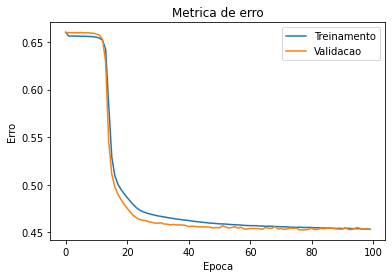

--> Acuracia: 0.7581


In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(clf.predict(x_test))
print(f'--> Acuracia: {accuracy_score(y_test, pred):.4f}')